In [1]:
# 문제 1
# "Librosa의 load 함수를 활용하여 '작은별' 오디오 파일의 샘플링 레이트와 지속 시간을 출력."
import librosa

filename = 'img/작은별.mp3'
y, sr = librosa.load(filename)

# print(y)
print("샘플링 레이트 : ", sr)
print("duration : ", len(y)/sr)

샘플링 레이트 :  22050
duration :  31.744807256235827


Text(0.5, 1.0, 'littel_star')

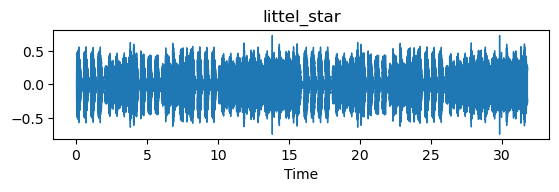

In [2]:
# 문제 2
# "Librosa와 Matplotlib 라이브러리를 사용하여 '작은별' 오디오 파일의 파형(waveform)을 시각화."
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(y, sr=sr)
plt.title("littel_star")

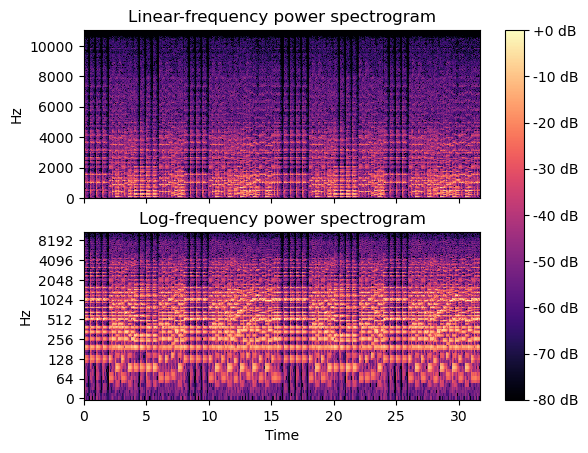

In [3]:
# 문제 3
# Librosa의 stft 함수를 이용해 '작은별' 오디오 파일의 단시간 푸리에 변환(STFT) 스펙트로그램을 계산하고, 
# specshow를 사용하여 시각화.

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True) 

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# 선형 주파수
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])

ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024 # 푸리에 연산 시 오프 길이를 재지정 하고 다시 실행
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)

# 로그 주파수
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[1])

ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()

fig.colorbar(img, ax=ax, format="%+2.f dB")

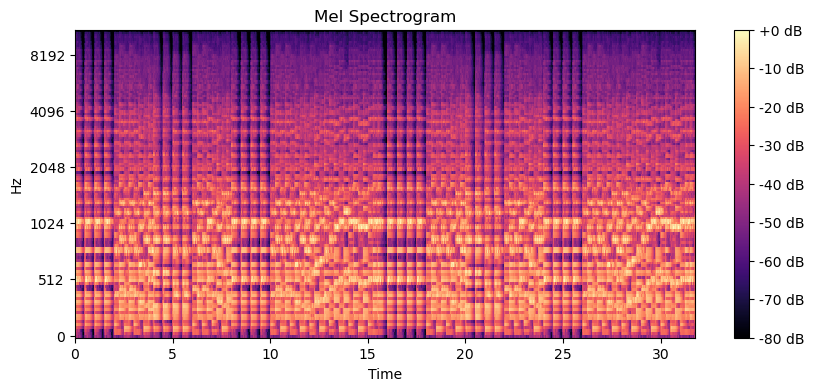

In [4]:
# 문제 4
# '작은별' 오디오에 대한 멜 스펙트로그램을 librosa.feature.melspectrogram을 사용하여 생성하고, 시각화
import librosa
import librosa.display

# 멜 스펙트로그램 생성
S = librosa.feature.melspectrogram(y=y, sr=sr)

# 멜 스펙트로그램을 데시벨로 변환
S_db = librosa.power_to_db(S, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

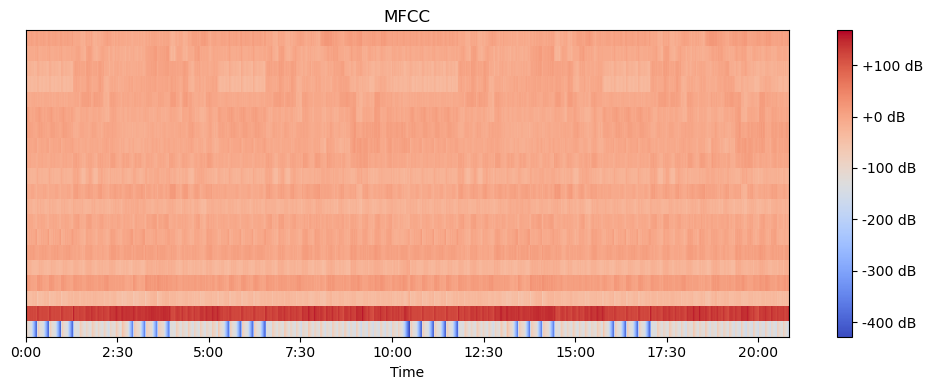

In [6]:
# 문제 5
# "Librosa를 이용하여 '작은별' 오디오 파일에서 MFCC(Mel-Frequency Cepstral Coefficients)를 추출하고, 
# 처음 13개의 MFCC를 시각화."

mfccs=librosa.feature.mfcc(y=y, sr=sr, hop_length=13 )
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [7]:
# 문제 6
# "Librosa를 사용하여 '작은별' 오디오의 비트(tempo)를 추정하고 출력."

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# 추출된 비트 프레임을 시간 (초)로 변환 -> 음악 분석 작업
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

[ 0.06965986  0.53405896  1.04489796  1.53251701  2.04335601  2.55419501
  3.06503401  3.55265306  4.06349206  4.55111111  5.03873016  5.54956916
  6.03718821  6.54802721  7.05886621  7.56970522  8.05732426  8.54494331
  9.03256236  9.54340136 10.05424036 10.56507937 11.07591837 11.56353741
 12.07437642 12.56199546 13.07283447 13.56045351 14.04807256 14.55891156
 15.04653061 15.55736961 16.04498866 16.53260771 17.04344671 17.53106576
 18.04190476 18.55274376 19.06358277 19.57442177 20.06204082 20.54965986
 21.03727891 21.54811791 22.05895692 22.56979592 23.05741497 23.56825397
 24.05587302 24.54349206 25.03111111 25.54195011]


Text(0.5, 1.0, 'harmonic+percussive')

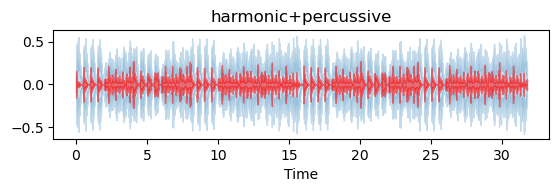

In [10]:
# 문제 7
# "Librosa의 effects.hpss 함수를 사용하여 '작은별' 오디오에서 음색(harmonic)과 리듬(percussive) 성분을 분리하고, 
# 각각을 시각화"

y_harmonic, y_percussive = librosa.effects.hpss(y) # 양자화 분리 작업 -> 음성인식

plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, alpha=0.5, color='r')
plt.title("harmonic+percussive")

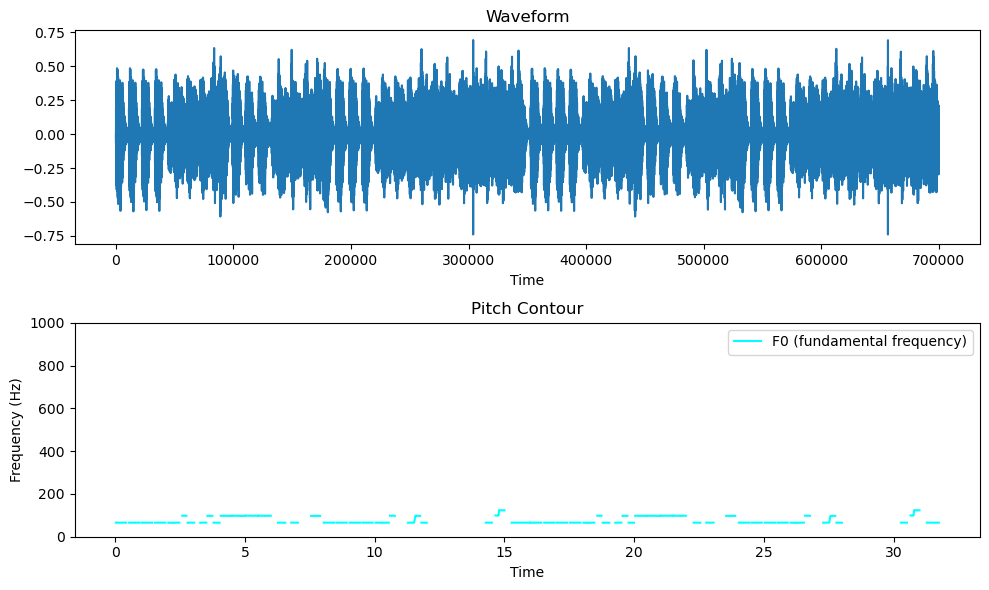

In [12]:
# 문제 8
# "Librosa의 pyin 함수를 활용하여 '작은별' 오디오의 음정(pitch)을 추적하고, 결과를 시각화."

import pandas as pd

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Time')

plt.subplot(2, 1, 2)
plt.plot(librosa.times_like(f0), f0, label='F0 (fundamental frequency)', color='cyan')
plt.title('Pitch Contour')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.ylim(0, 1000)

plt.tight_layout()
plt.show()

In [14]:
# 문제 9
# "Librosa의 effects.pitch_shift 함수를 사용하여 '작은별' 오디오의 피치를 한 옥타브 올리고, 결과를 오디오로 확인."
import IPython.display

y_shifted = librosa.effects.pitch_shift(y, sr=sr , n_steps =12) # default 'bins_per_octave' = 12
IPython.display.Audio(data=y_shifted, rate=sr)

In [15]:
# 문제 10
# "Librosa의 effects.time_stretch 함수를 사용하여 '작은별' 오디오의 재생 속도를 2배로 빠르게 하고, 변경된 오디오로 확인"
y_fast = librosa.effects.time_stretch(y, rate=2.0)
IPython.display.Audio(data=y_fast, rate=sr)